In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Energy Consumption prediction\Electricity consumption.csv")
data.sample(5)

,Unnamed: 0,Start time UTC,End time UTC,Electricity consumption in Odisha,Start time IST UTC+05:30,End time IST UTC+05:30
7063,7063,2016-10-20 18:00:00,2016-10-20 19:00:00,10016.0,2016-10-20 23:30:00,2016-10-21 00:30:00
8798,8798,2016-12-31 15:00:00,2016-12-31 16:00:00,10672.0,2016-12-31 20:30:00,2016-12-31 21:30:00
46432,46432,2021-04-03 15:00:00,2021-04-03 16:00:00,9843.0,2021-04-03 20:30:00,2021-04-03 21:30:00
29318,29318,2019-05-06 07:00:00,2019-05-06 08:00:00,9590.0,2019-05-06 12:30:00,2019-05-06 13:30:00
47758,47758,2021-05-28 21:00:00,2021-05-28 22:00:00,8153.0,2021-05-29 02:30:00,2021-05-29 03:30:00


In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data

,Start time UTC,End time UTC,Electricity consumption in Odisha,Start time IST UTC+05:30,End time IST UTC+05:30
0,2015-12-31 21:00:00,2015-12-31 22:00:00,10800.0,2016-01-01 02:30:00,2016-01-01 03:30:00
1,2015-12-31 22:00:00,2015-12-31 23:00:00,10431.0,2016-01-01 03:30:00,2016-01-01 04:30:00
2,2015-12-31 23:00:00,2016-01-01 00:00:00,10005.0,2016-01-01 04:30:00,2016-01-01 05:30:00
3,2016-01-01 00:00:00,2016-01-01 01:00:00,9722.0,2016-01-01 05:30:00,2016-01-01 06:30:00
4,2016-01-01 01:00:00,2016-01-01 02:00:00,9599.0,2016-01-01 06:30:00,2016-01-01 07:30:00
...,...,...,...,...,...
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,11447.0,2021-12-31 21:30:00,2021-12-31 22:30:00
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,11237.0,2021-12-31 22:30:00,2021-12-31 23:30:00
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,10914.0,2021-12-31 23:30:00,2022-01-01 00:30:00
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,10599.0,2022-01-01 00:30:00,2022-01-01 01:30:00


In [6]:
# Drop the specified columns
del data["Start time UTC"]
del data["End time UTC"]
del data["Start time IST UTC+05:30"]

# Rename columns with exact names
data.rename(columns={"End time IST UTC+05:30": "DateTime",
                     "Electricity consumption in Odisha ": "Consumption"}, inplace=True)

# Display the first few rows to verify the changes
print(data.head(5))

   Electricity consumption in Odisha             DateTime
0                            10800.0  2016-01-01 03:30:00
1                            10431.0  2016-01-01 04:30:00
2                            10005.0  2016-01-01 05:30:00
3                             9722.0  2016-01-01 06:30:00
4                             9599.0  2016-01-01 07:30:00


In [7]:
dataset = data
dataset["Month"] = pd.to_datetime(data["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(data["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(data["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(data["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(data["DateTime"]).dt.weekday
dataset["Day"] = pd.to_datetime(data["DateTime"]).dt.day_name()
dataset = data.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [8]:
dataset[69:75]

,Electricity consumption in Odisha,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04 00:30:00,11756.0,1,2016,2016-01-04,00:30:00,0,Monday
2016-01-04 01:30:00,11475.0,1,2016,2016-01-04,01:30:00,0,Monday
2016-01-04 02:30:00,11721.0,1,2016,2016-01-04,02:30:00,0,Monday
2016-01-04 03:30:00,11626.0,1,2016,2016-01-04,03:30:00,0,Monday
2016-01-04 04:30:00,11253.0,1,2016,2016-01-04,04:30:00,0,Monday
2016-01-04 05:30:00,10925.0,1,2016,2016-01-04,05:30:00,0,Monday


In [9]:
dataset[69:-123]

,Electricity consumption in Odisha,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04 00:30:00,11756.0,1,2016,2016-01-04,00:30:00,0,Monday
2016-01-04 01:30:00,11475.0,1,2016,2016-01-04,01:30:00,0,Monday
2016-01-04 02:30:00,11721.0,1,2016,2016-01-04,02:30:00,0,Monday
2016-01-04 03:30:00,11626.0,1,2016,2016-01-04,03:30:00,0,Monday
2016-01-04 04:30:00,11253.0,1,2016,2016-01-04,04:30:00,0,Monday
...,...,...,...,...,...,...,...
2021-12-26 19:30:00,12212.0,12,2021,2021-12-26,19:30:00,6,Sunday
2021-12-26 20:30:00,12495.0,12,2021,2021-12-26,20:30:00,6,Sunday
2021-12-26 21:30:00,12550.0,12,2021,2021-12-26,21:30:00,6,Sunday


In [10]:
dataset=dataset[69:-123]

C:\Users\alisa\AppData\Local\Temp\ipykernel_13728\2607008584.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


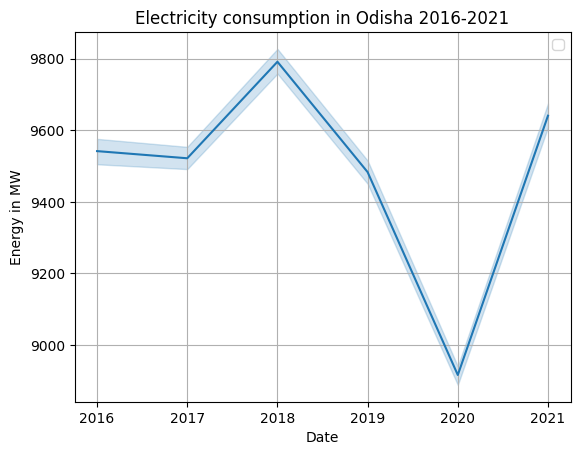

In [11]:
sns.lineplot(data = dataset , x=dataset['Year'] , y=dataset['Electricity consumption in Odisha'])
plt.title("Electricity consumption in Odisha 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

In [12]:
dataset.shape

(52774, 7)

In [13]:
train = dataset.iloc[:15833]
test = dataset.iloc[15833:]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()# use to convet the data in the scale of 0-1

In [15]:
# Select only numeric columns to scale
numeric_columns = ['Electricity consumption in Odisha']
train_numeric = train[numeric_columns]
test_numeric = test[numeric_columns]

# Fit the scaler on training data and transform both train and test data
scaler.fit(train_numeric)
scaled_train = scaler.transform(train_numeric)
scaled_test = scaler.transform(test_numeric)


In [16]:
scaled_train[:10]

array([[0.64791842],
       [0.61837679],
       [0.64423886],
       [0.63425147],
       [0.59503785],
       [0.56055509],
       [0.53521867],
       [0.52870059],
       [0.54299832],
       [0.58568124]])

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
# define generator
n_input = 3 # time steps like for 3 hour
n_features = 1 # now i am only using the "Electricity consumption" column as input
#tf.keras.preprocessing.sequence.TimeseriesGenerator(data,targets,length,batch_size=128)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [19]:
X,y = generator[0] # generator is used to batches the input . This line accesses the first batch from the generator.
# X-> input , y-> prediction
print(f'Given the Array: \n{X.flatten()}') # X.flatten(): This flattens the 2D input array to a 1D array for easier reading.
print(f'Predict this y: \n {y}')

Given the Array: 
[0.64791842 0.61837679 0.64423886]
Predict this y: 
 [[0.63425147]]


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [21]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\alisa\OneDrive\Desktop\Energy Consumption prediction\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Check if generator is correctly initialized
print(type(generator))  # Should be <class 'tensorflow.keras.preprocessing.sequence.TimeseriesGenerator'>


<class 'keras.src.legacy.preprocessing.sequence.TimeseriesGenerator'>


In [24]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Example data
scaled_train = np.array(scaled_train)  # Ensure it's a numpy array

# Define generator
n_input = 12  # Number of time steps to look back
n_features = scaled_train.shape[1]  # Number of features in your data
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Define model
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(1)) # dence layer 1 iss lia hai kun ki 1 value hi predict kar raha hu is lia
model.compile(optimizer='adam', loss='mse') #Mean Squared Error

# Print the model summary to check the structure
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(generator, epochs=50) # generator have both I/p and O/P


Epoch 1/50
   77/15821 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 0.0445  

c:\Users\alisa\OneDrive\Desktop\Energy Consumption prediction\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15821/15821 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0022
Epoch 2/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 4.2941e-04
Epoch 3/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 4.0351e-04
Epoch 4/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 3.7951e-04
Epoch 5/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 3.7095e-04
Epoch 6/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 3.5432e-04
Epoch 7/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 3.4112e-04
Epoch 8/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 3.3210e-04
Epoch 9/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 3.0988e-04
Epoch 10/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 3.1182e-04
Epoch 11/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 3.0366e-04
Epoch 12/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - loss: 2.9511e-04
Epoch 13/50
15821/15821 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 2.8661e-04
Epoch 14/50
15821/15821

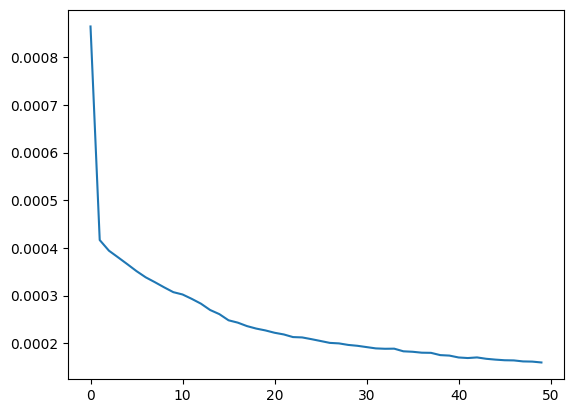

In [27]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [28]:
test_numeric.shape
test_numeric

,Electricity consumption in Odisha
DateTime,
2017-10-24 02:30:00,10666.0
2017-10-24 03:30:00,10213.0
2017-10-24 04:30:00,9927.0
2017-10-24 05:30:00,9728.0
2017-10-24 06:30:00,9699.0
...,...
2021-12-26 19:30:00,12212.0
2021-12-26 20:30:00,12495.0
2021-12-26 21:30:00,12550.0


In [29]:
past_100_days = pd.DataFrame(train_numeric[-100:])

In [30]:
test_df = pd.DataFrame(test_numeric)

In [31]:
import pandas as pd
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [32]:
final_df.head()

,Electricity consumption in Odisha
0,10749.0
1,10600.0
2,10216.0
3,10203.0
4,10008.0


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.5877622 ],
       [0.57156831],
       [0.52983371],
       ...,
       [0.78350179],
       [0.79132703],
       [0.78611021]])

In [34]:
input_data.shape

(37041, 1)

In [35]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(36941, 100, 1)
(36941,)


In [37]:
# Making predictions

y_pred = model.predict(x_test)

1155/1155 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step


In [38]:
y_pred.shape

(36941, 1)

In [39]:
y_test

array([0.57874144, 0.52950766, 0.49842408, ..., 0.78350179, 0.79132703,
       0.78611021])

In [40]:
y_pred

array([[0.59774995],
       [0.56872195],
       [0.5208267 ],
       ...,
       [0.7926514 ],
       [0.7762711 ],
       [0.79159963]], dtype=float32)

In [41]:
scaler.scale_

array([0.00010868])

In [42]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

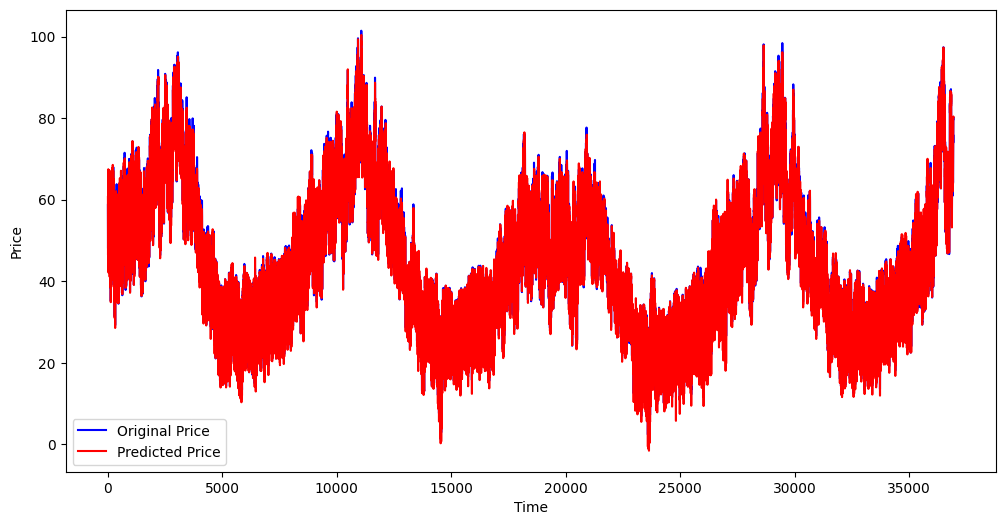

Mean Squared Error: 3.08
Mean Absolute Error: 1.29


In [43]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price" )
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

In [44]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  1.2886079055600252


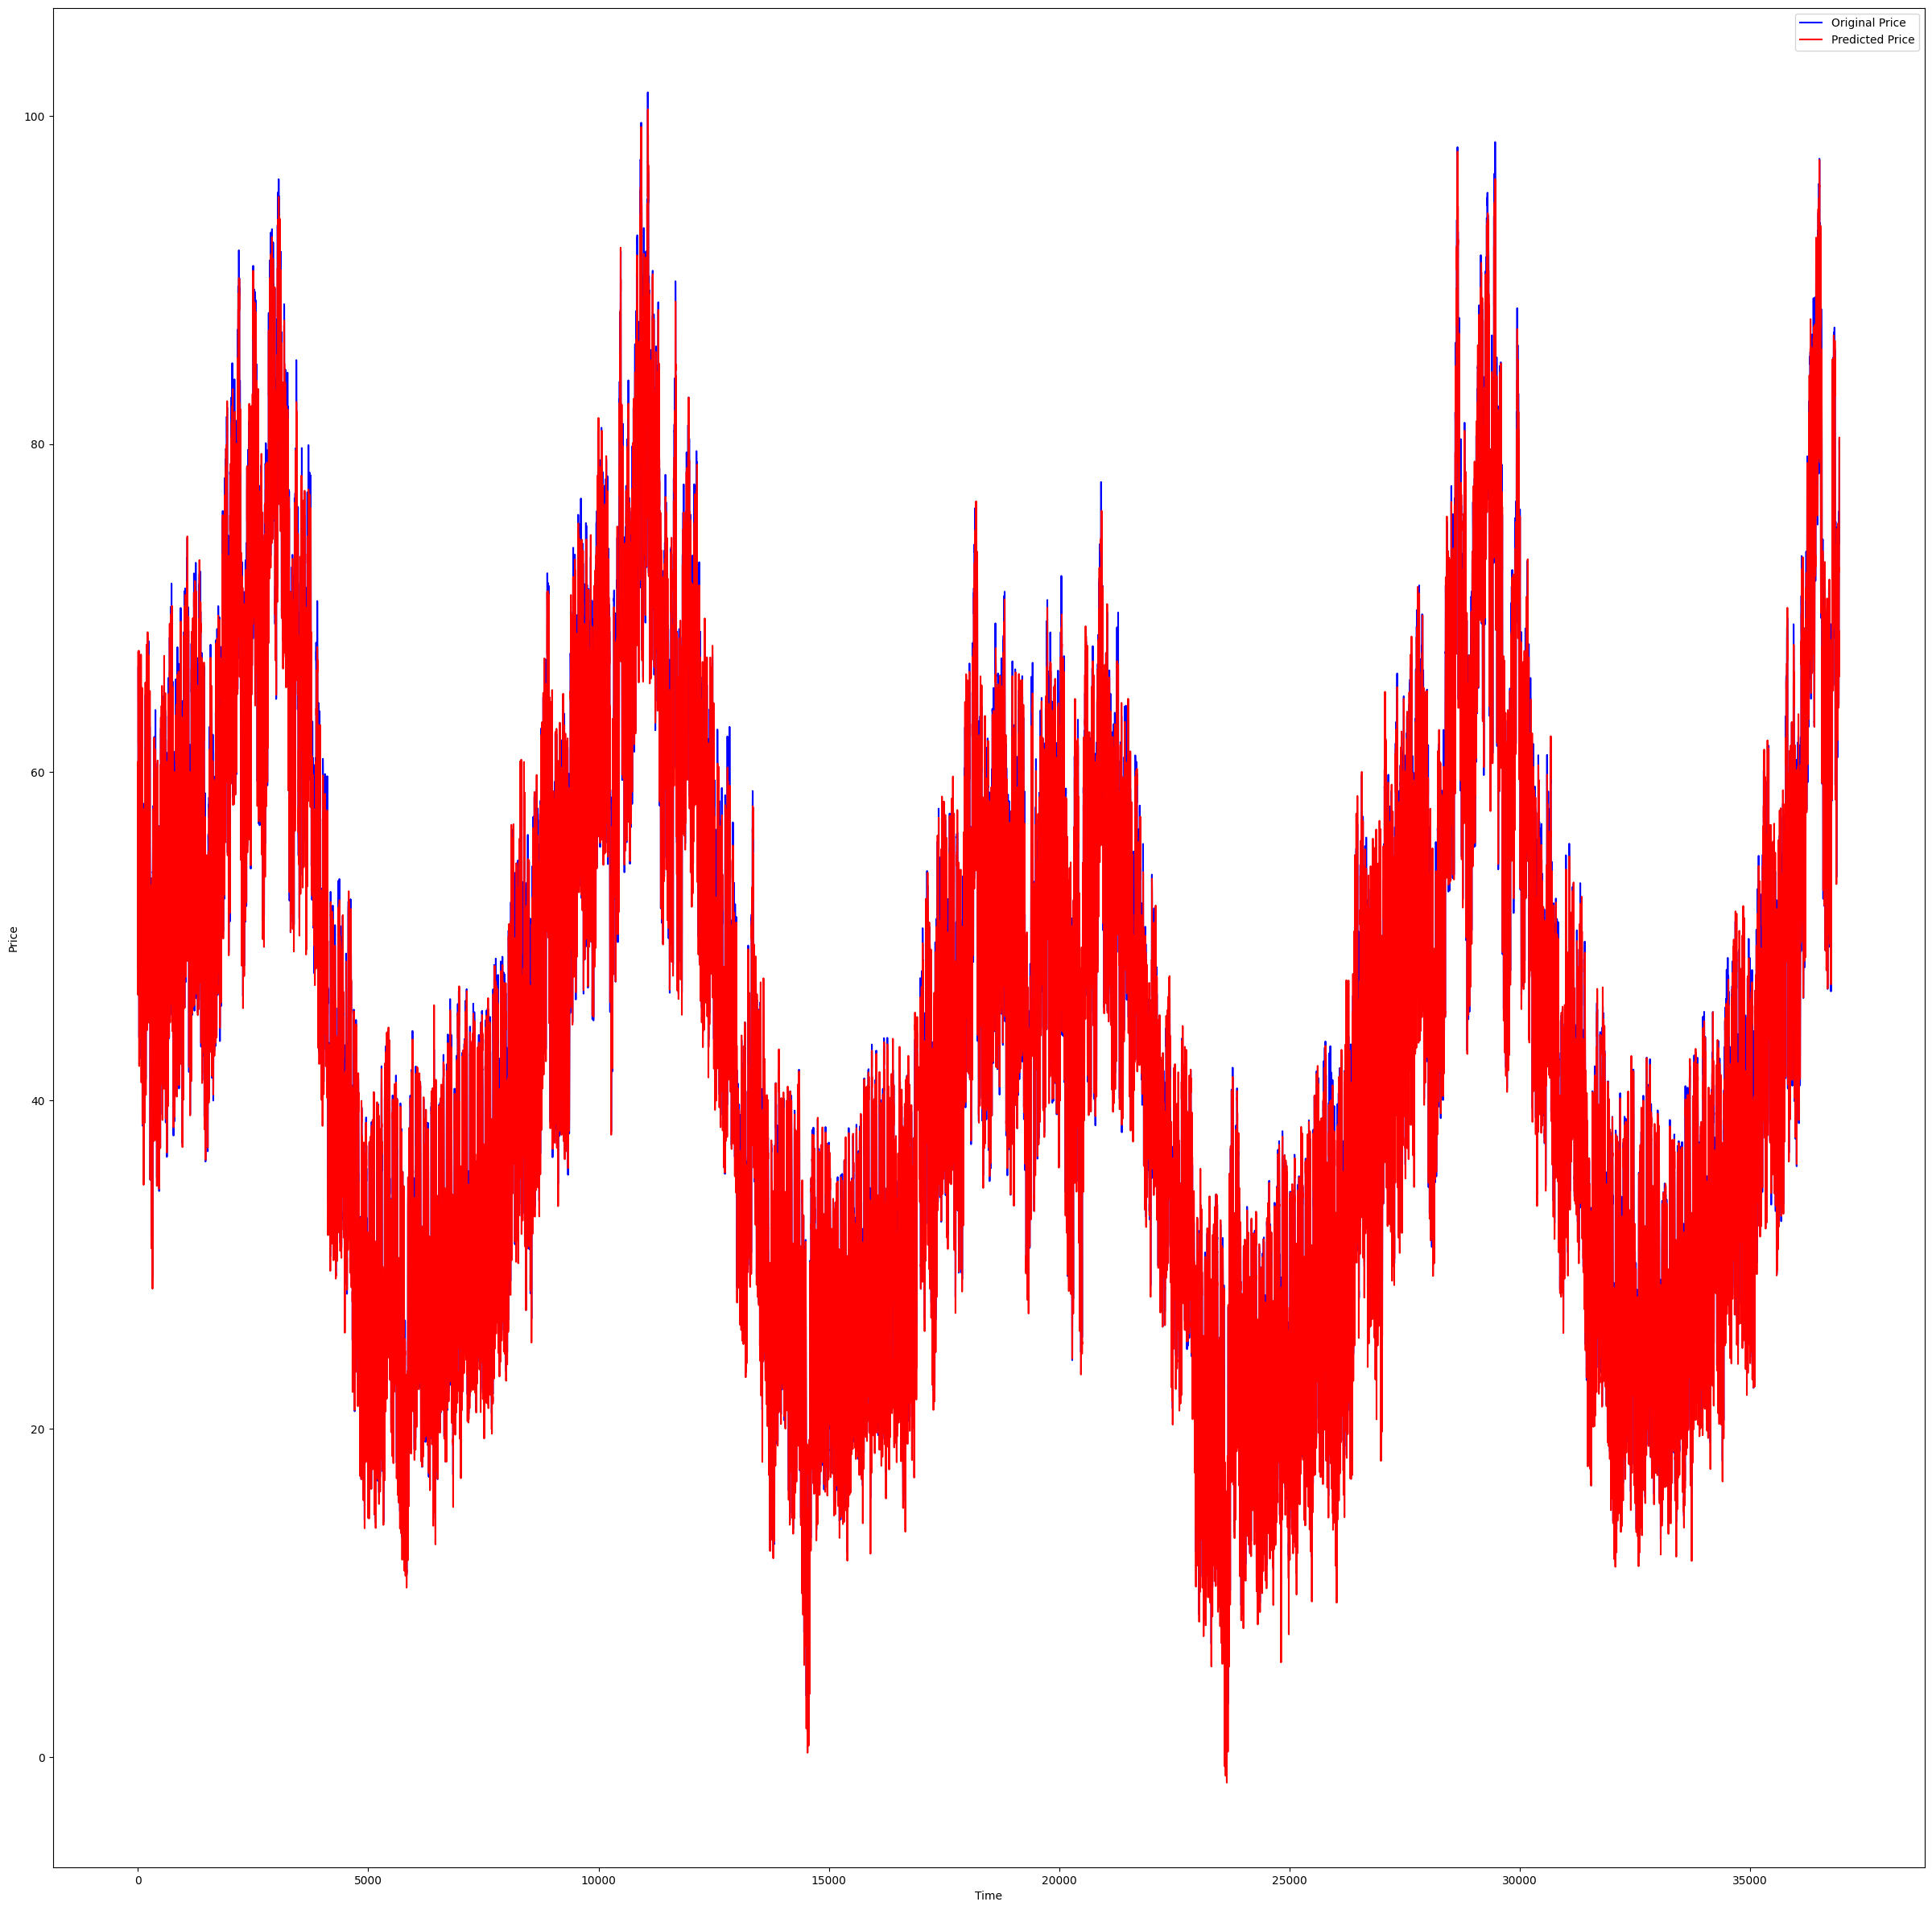

Mean Squared Error: 3.08
Mean Absolute Error: 1.29


In [45]:
plt.figure(figsize = (30,30))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
